<a href="https://colab.research.google.com/github/Kovibordy/test____1/blob/main/lab5/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

In [1]:
!pip install datasets seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.4 MB/s eta 0:00:00


##Выбор и исключение переменных

Загрузите набор данных из файла ```Regressions datasets``` в соответствии с вашим вариантом (о смене датасета - индивидуально)

In [3]:
df = pd.read_csv('/content/Real estate.csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числоая переменная для задачи регрессии)
2. С помощью EDA (см практика) отобрать признаки, которые влияют на Y (можно определить гарфически, можно числами).
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо)
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее)

P.S. Важное замечание, слишком уникальные признаки (имена людей, названия город, ID юзера или чего-то еще - не берем, так как они не влияют на целевую переменную, а если и влияет, то это случайно)

In [4]:
df= df.drop(columns = ['No'])
Y = df['Y house price of unit area']
X = df.drop(columns = ['Y house price of unit area'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


много пустых значений

In [5]:
df.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [7]:
df['X4 number of convenience stores'] = df['X4 number of convenience stores'].astype('category')



по корреляции видно что на у влияют координаты наша категориальная а так же х2 и х3 а х1 можем не брать по поводу мульиколлинеарности координаты друг с другом и с кол-во магазином рядом но не сильно поэтому оставляем


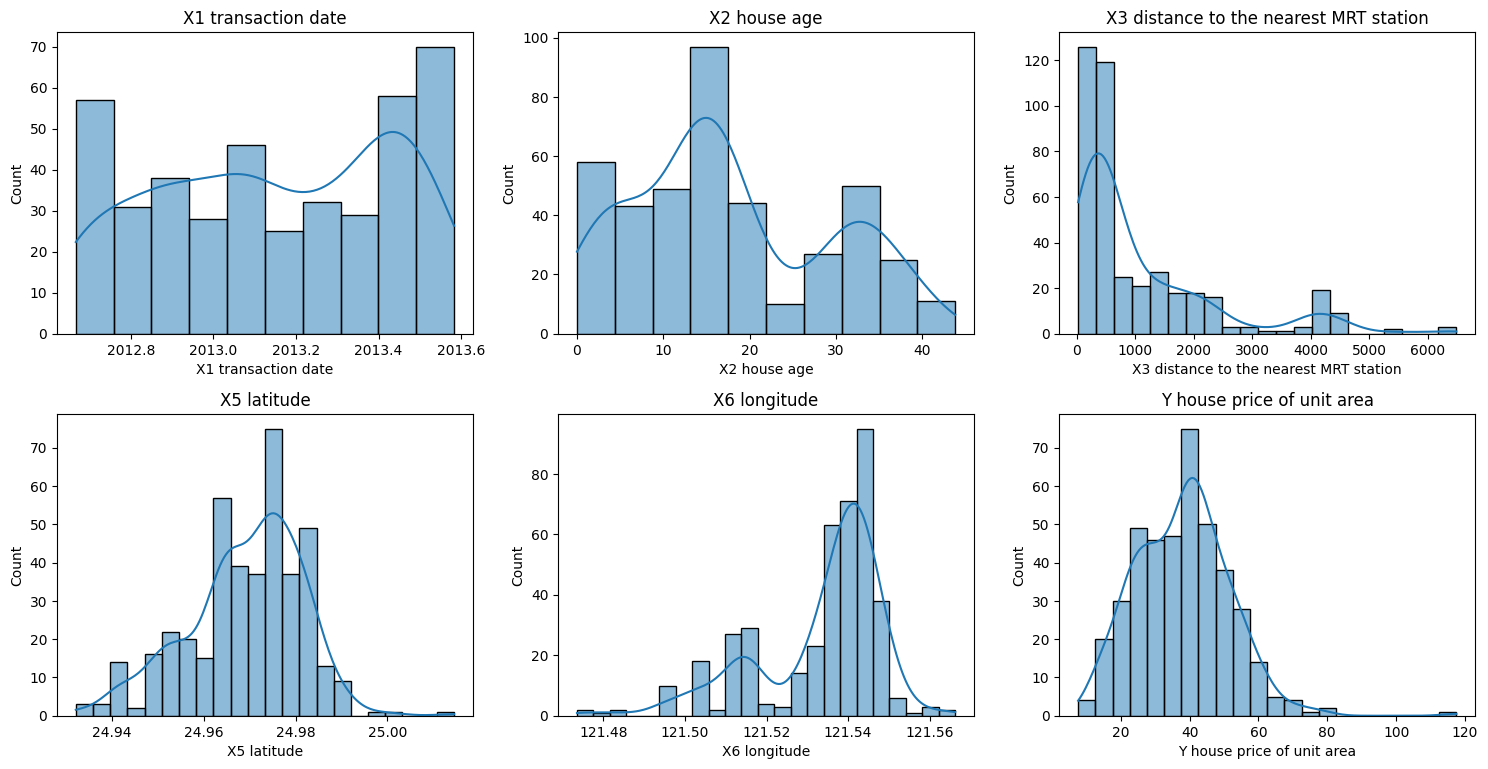

In [8]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

<Axes: >

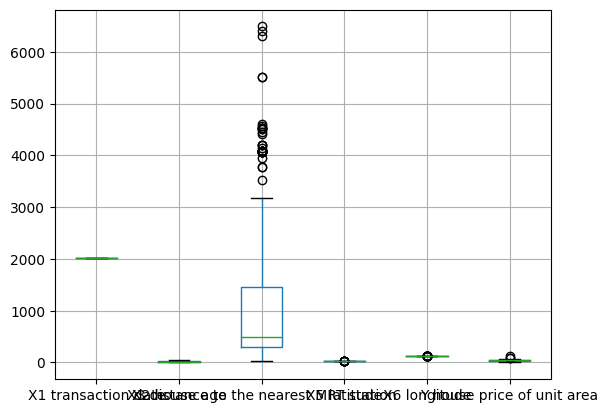

In [9]:
df.boxplot()

In [10]:
df = df[np.abs(stats.zscore(df['X3 distance to the nearest MRT station'])) < 3]

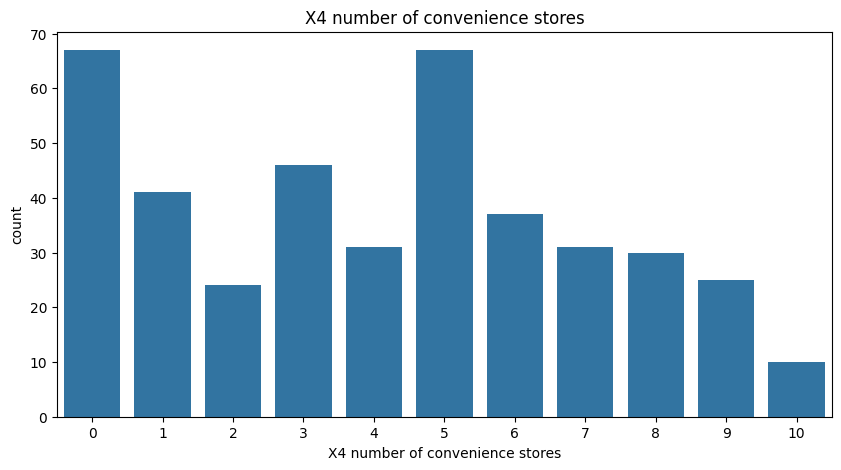

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='X4 number of convenience stores')
plt.title('X4 number of convenience stores')
plt.show()

In [12]:
df_lr = df.drop(columns = ['X1 transaction date'])
df_lr

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


### Трансформация набора данных

(OneHotEncode для категориальных переменных)

(Standard or MinMax or бининг или другое преобразование для числовых)

P.S. Целевую переменную не преобразовываем, оставляем как есть


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_lr[['X2 house age','X3 distance to the nearest MRT station','X5 latitude','X6 longitude']])
stores_dummies = pd.get_dummies(df_lr['X4 number of convenience stores'], prefix='stores').reset_index()
# Объединение масштабированных признаков и dummy переменных
df_transformed = pd.DataFrame(scaled_features, columns=['X2 house age','X3 distance to the nearest MRT station','X5 latitude','X6 longitude'])
df_transformed = pd.concat([df_transformed, stores_dummies], axis=1)
df_transformed
# df_research = transform_dataframe(df_lr[['X2 house age','X3 distance to the nearest MRT station','X5 latitude','X6 longitude','X4 number of convenience stores']])
# df_research
df_y = df_lr['Y house price of unit area'].reset_index()
df_itog = pd.concat([df_transformed.drop(columns = ['index']),df_y['Y house price of unit area'] , ], axis=1)
df_itog

,X2 house age,X3 distance to the nearest MRT station,X5 latitude,X6 longitude,stores_0,stores_1,stores_2,stores_3,stores_4,stores_5,stores_6,stores_7,stores_8,stores_9,stores_10,Y house price of unit area
0,1.263430,-0.822431,1.115965,0.438113,0,0,0,0,0,0,0,0,0,0,1,37.9
1,0.165752,-0.628111,0.901582,0.386682,0,0,0,0,0,0,0,0,0,1,0,42.2
2,-0.378696,-0.404279,1.479768,0.696678,0,0,0,0,0,1,0,0,0,0,0,47.3
3,-0.378696,-0.404279,1.479768,0.696678,0,0,0,0,0,1,0,0,0,0,0,54.8
4,-1.107554,-0.554514,0.822812,0.593815,0,0,0,0,0,1,0,0,0,0,0,43.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,-0.343570,2.680795,-2.248400,-2.128512,1,0,0,0,0,0,0,0,0,0,0,15.4
405,-1.054865,-0.817543,0.413533,0.639610,0,0,0,0,0,0,0,0,0,1,0,50.0
406,0.104282,-0.554162,0.811443,0.411341,0,0,0,0,0,0,0,1,0,0,0,40.6
407,-0.835330,-0.804962,-0.202821,0.468408,0,0,0,0,0,1,0,0,0,0,0,52.5


### Разделение данных

Для начала, разделить данные на X и Y

Разбить данные на тестовую и обучающую выборки

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

y = df_itog['Y house price of unit area']
X = df_itog.drop(columns=['Y house price of unit area'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Обучение
#### 1 Регрессия
- Обучить линейную регрессию на тренировочных данных (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2
- Вывести и написать выводы о коэфициентах регрессии
- Написать формулу регрессии

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

#### 2 Ближайшие соседи
- Обучить KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

{'MAE': 5.501533029327101, 'MSE': 59.170233685241335, 'R2': 0.6380229874378296, 'mape (reverted - % верно угаданых)': 83.40422192300653, 'mape (original - % ошибок)': 16.595778076993465}
{'MAE': 6.554192650748593, 'MSE': 140.78969359999797, 'R2': 0.43057989431246846, 'mape (reverted - % верно угаданых)': 83.25552952487347, 'mape (original - % ошибок)': 16.744470475126537}
[-3.24676193 -5.20330462  3.245254   -0.76464151 -3.0578943  -5.49158372
 -5.90189688 -7.54510052 -2.61204542  1.53972805  2.83955128  3.12842771
  5.02472376  7.7267208   4.34936925]


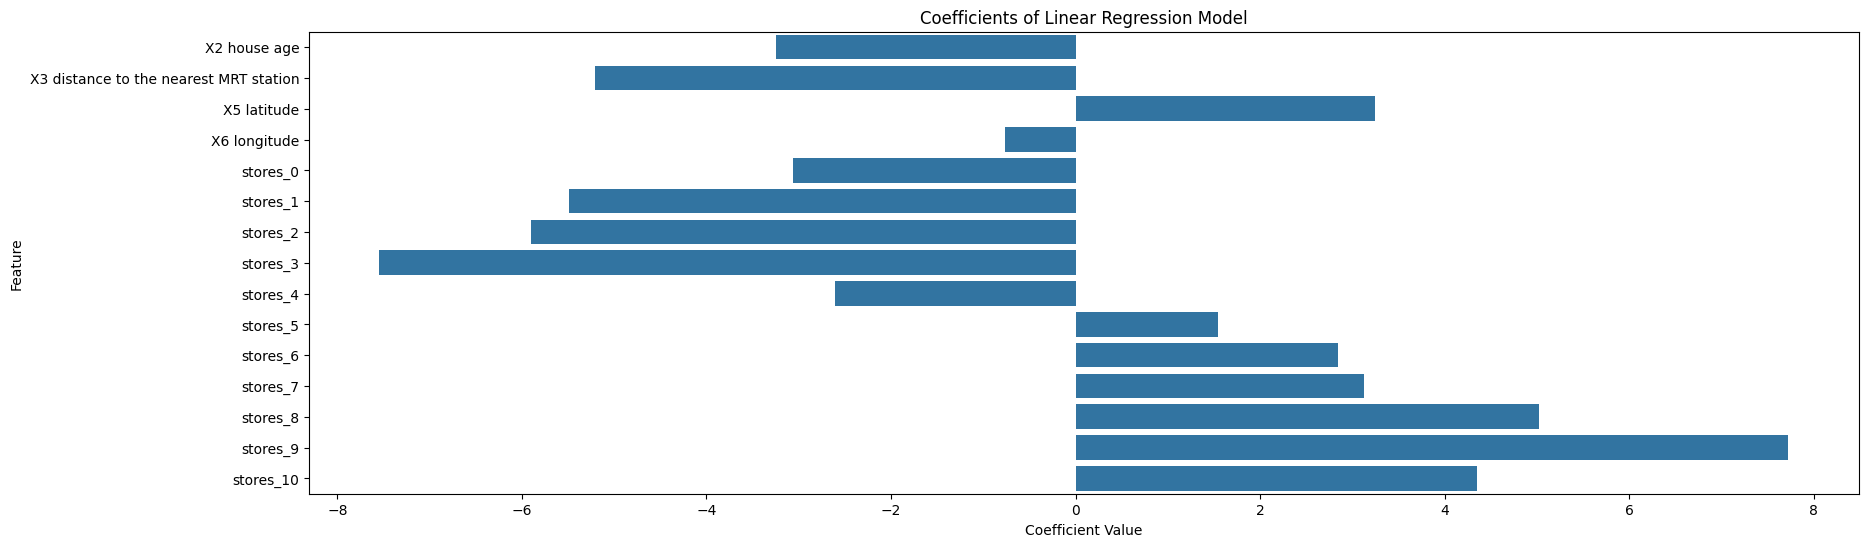

In [15]:
def compute_regression(X, y):
  # Создание и обучение модели линейной регрессии
  model = LinearRegression()
  model.fit(X, y)

  return model


def compute_metrics(y, predicted):
  # Оценка качества модели
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % верно угаданых)': (1 - mape) * 100,
      'mape (original - % ошибок)': mape * 100,
  }

model = compute_regression(X_train, y_train) # Прогнозирование на обучающей выборке (проверка на переобучение)
y_pred = model.predict(X_train)

print(compute_metrics(y_train, y_pred))

model = compute_regression(X_train, y_train) # Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

print(compute_metrics(y_test, y_pred))
coefficients = model.coef_
intercept = model.intercept_
print(coefficients)
# Названия признаков
feature_names = ['X2 house age',	'X3 distance to the nearest MRT station',	'X5 latitude',	'X6 longitude',
                 'stores_0',	'stores_1',	'stores_2',	'stores_3',	'stores_4',	'stores_5',
                 'stores_6',	'stores_7',	'stores_8',	'stores_9',	'stores_10']

# Визуализация коэффициентов
plt.figure(figsize=(20, 6))
sns.barplot(x=coefficients, y=feature_names)
plt.title('Coefficients of Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

Метрики не показывают переобучение или недообучение. Высокий MSE объясняется несколькими большими различиями, что делает его выше, чем MAE на 16%. Однако по R2 видно, что модель хуже описывает тестовые данные, и график указывает на большое влияние количества магазинов.

In [16]:
formula = str(round(intercept,2))
for coef, name_per in zip(coefficients,feature_names):
  formula+=f' + {coef:.2f}*{name_per}'
'y = '+formula

'y = 38.52 + -3.25*X2 house age + -5.20*X3 distance to the nearest MRT station + 3.25*X5 latitude + -0.76*X6 longitude + -3.06*stores_0 + -5.49*stores_1 + -5.90*stores_2 + -7.55*stores_3 + -2.61*stores_4 + 1.54*stores_5 + 2.84*stores_6 + 3.13*stores_7 + 5.02*stores_8 + 7.73*stores_9 + 4.35*stores_10'

In [17]:
import numpy as np
from collections import Counter
from sklearn.metrics.pairwise import euclidean_distances

def knn_regressor(X_train, y_train, X_test, k=5):
    """
    Простая реализация KNN регрессии.

    Параметры:
    X_train: np.array - обучающий набор признаков
    y_train: np.array - обучающий набор целевой переменной
    X_test: np.array - тестовый набор признаков
    k: int - количество соседей

    Возвращает:
    y_pred: np.array - предсказанные значения для тестового набора
    """

    # Рассчитываем метрику расстояния (для примера - Евклидово расстояние)
    #от каждой тестовой точки до всех точек обучающего набора
    distances = euclidean_distances(X_test, X_train)

    # Инициализация массива для предсказаний
    y_pred = np.zeros(len(X_test))

    # Цикл по всем тестовым точкам
    for i in range(0, len(X_test)):
      test_point = X_test.iloc[i].to_numpy()
      neighbors = np.argsort(distances[i])[:k]
      y_pred[i] = np.mean(y_train[neighbors])

    return y_pred

# Пример использования функции:
# X_train, y_train, X_test уже должны быть определены


y_pred = knn_regressor(X_train, y_train.to_numpy(), X_test, k=3)
compute_metrics(y_test, y_pred)

{'MAE': 5.914634146341464,
 'MSE': 127.18926829268293,
 'R2': 0.485586446410589,
 'mape (reverted - % верно угаданых)': 85.29093638550745,
 'mape (original - % ошибок)': 14.709063614492553}

##Задание для гениев*

Удачи 😈

В практике есть примеры реализации ```linear_regression``` и ```knn_regressor```, но есть нюанс... Сейчас ни linear_regression, ни knn_regressor не поддерживают сохранения состояния для последующего возможного использования.

Необходимо - реализовать два класса LinearRegression и KNNRegression (примеры обучения моделек есть). В этих классах обязатльно должны быть два метода
```
.fit(X: np.array, y: np.array) -> None - обучить модель и сохранить внутреннее состояние модели
.predict(X) -> np.array - предсказать y на основе X
```
При инициализации класса - передавать параметры модели в момент инициализации. Например:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

В качестве тестов можно использовать KNN и LinearRegression из sklearn, результат работы ваших объектов должен примерно совпадать с результатами работы объектов из sklearn

В результате работы сделать сравнение с теми же данными в sklearn

In [ ]:
"""
Результат работы
"""